In [1]:
from GPyOpt.methods import BayesianOptimization
import numpy as np

def threehumpcamel2(x):
    return np.atleast_2d(2*x[:,0]**2-1.05*x[:,0]**4+x[:,0]**6/6+x[:,0]*x[:,1]+x[:,1]**2).T

max_its = 100

thc_bopt = BayesianOptimization(f=threehumpcamel2, bounds=[(-5,5),(-5,5)])
thc_bopt.run_optimization(max_iter=max_its)

We run our bayesian optimization for 100 iterations after generating 5 random points to initialize our search (Note: in my experience, unfortunately this initialization can affect the outcome of the optimization)

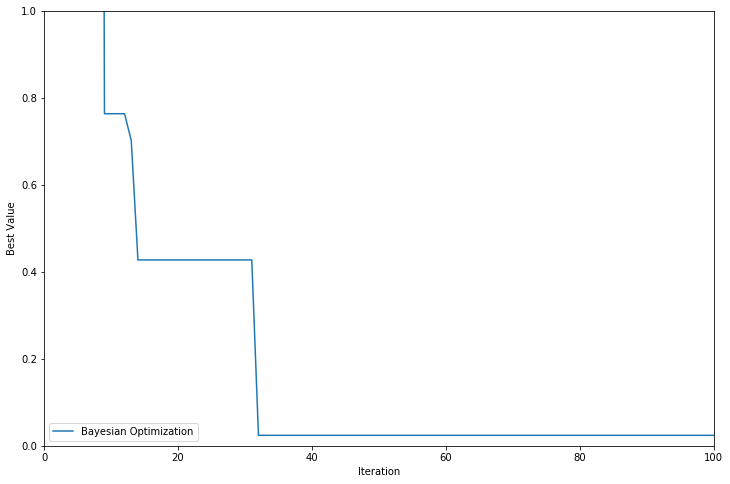

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(thc_bopt.Y_best,label="Bayesian Optimization")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.ylim((0,1))
plt.xlim((0,100))
plt.legend()
plt.show()

Here are the points that the algorithm visited. 

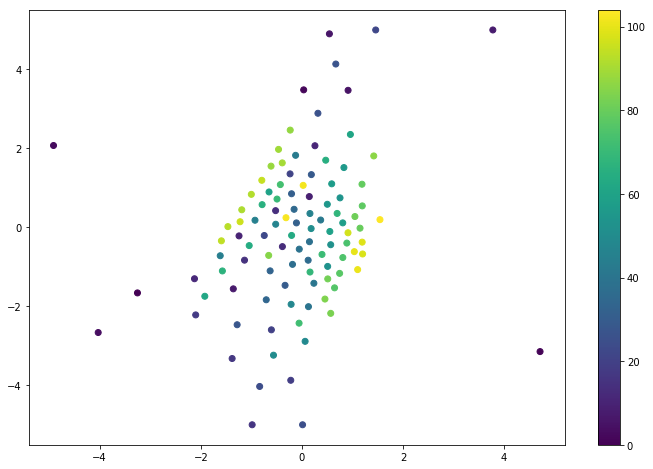

In [3]:
X_bayes = [z0[0] for z0 in thc_bopt.X]
Y_bayes = [z1[1] for z1 in thc_bopt.X]

plt.figure(figsize=(12, 8))
plt.scatter(X_bayes,Y_bayes,c=range(105))
plt.colorbar()
plt.show()

Below is some code borrowed from [this website](http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/) that illustrates how the algorithm explores the 2D space.

In [4]:
###############################################################
###### This allows us to display the video after we generate it
###############################################################
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=1, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

#### Creates the scatter plot above with lines to indicate where the 
#### new function evalutation is
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(12,8))
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
ax.scatter([0],[0],marker = 'x')
arr, = ax.plot([],[])
scat, = ax.plot([], [], 'ro')
npt, = ax.plot([X_bayes[0]],[Y_bayes[0]],'ko',ms=15,marker = 's')

# initialization function: plot the background of each frame
def init():
    scat.set_data([], [])
    return scat,

# animation function.  This is called sequentially
def animate(i):
    x = X_bayes[:i]
    y = Y_bayes[:i]
    scat.set_data(x, y)
    npt.set_data([X_bayes[i]],[Y_bayes[i]])
    if i > 0 & i < 100:
        arr.set_data([X_bayes[i-1],X_bayes[i]],[Y_bayes[i-1],Y_bayes[i]])
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=5000, blit=True)

# call our new function to display the animation
display_animation(anim)